<a href="https://colab.research.google.com/github/hyunicecream/Inflearn/blob/main/%ED%81%AC%EB%A1%A4%EB%A7%81_%EC%97%B0%EC%8A%B5%EB%AC%B8%EC%A0%9C_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 문제 3번

각 회사별 거래 총량과 전그룹사 거래 총량을 subplot으로 그려주세요.

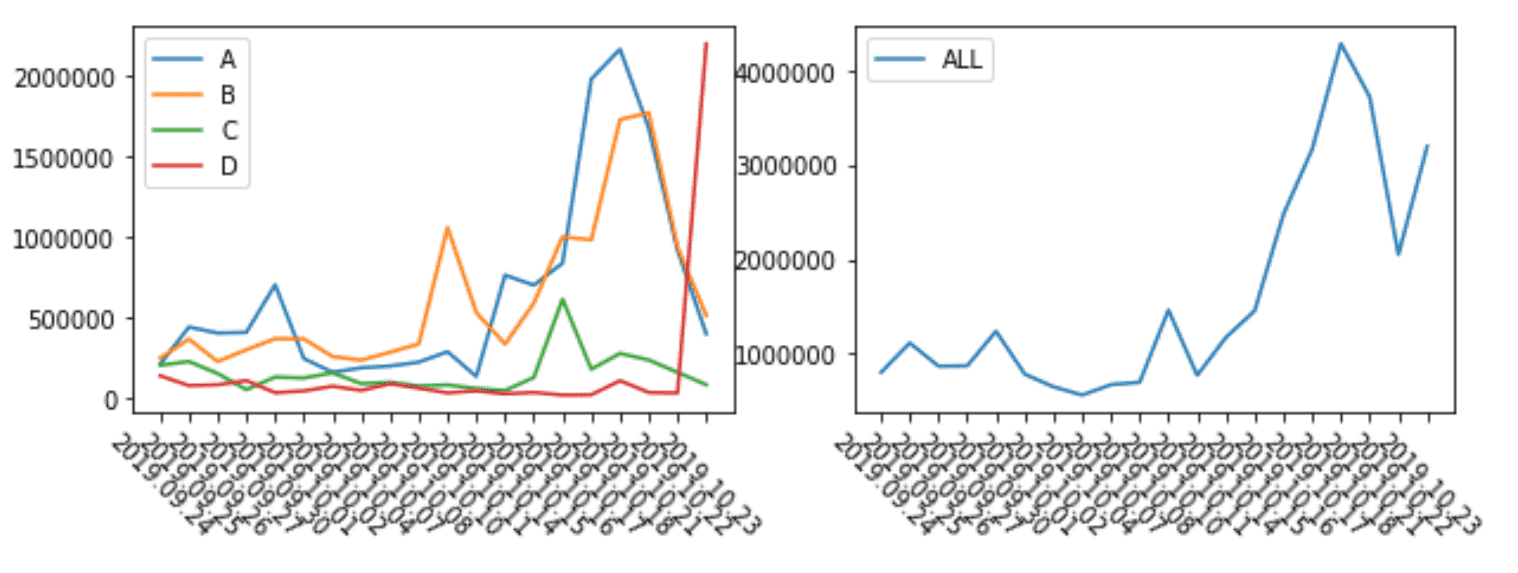

In [ ]:
import requests
from bs4 import BeautifulSoup

response = requests.get('http://paullab.synology.me/stock.html')

response.encoding = 'utf-8'
html = response.text

soup = BeautifulSoup(html, 'html.parser')

In [ ]:
soup.select('.main')[2] # 제주코딩베이스캠프 연구원
soup.select('.main')[3] # 제주코딩베이스캠프 공업
soup.select('.main')[4] # 제주코딩베이스캠프 출판사
soup.select('.main')[5] # 제주코딩베이스캠프 학원

In [ ]:
그룹사별일일데이터 = soup.select('.main')[2:6]
그룹사별일일거래량 = [[],[],[],[]]
그룹사전체일일거래량 = []
# 데이터 구조 : 
# 그룹사별일일거래량 = [[출판사], [연구원], [공업사], [학원]]
그룹사별일일데이터[0].select('.table > tbody > tr')[0]
그룹사별일일데이터[0].select('.table > tbody > tr')[1].select('td')[-1].text.replace(',','')

'398421'

In [ ]:
for j in range(1, len(soup.select('.main')[2].select('table > tbody > tr'))):
    그룹사별일일거래량[0].append(int(그룹사별일일데이터[0].select('.table > tbody > tr')[j].
                            select('td')[-1].text.replace(',', '')))
    그룹사별일일거래량[1].append(int(그룹사별일일데이터[1].select('.table > tbody > tr')[j].
                            select('td')[-1].text.replace(',', '')))
    그룹사별일일거래량[2].append(int(그룹사별일일데이터[2].select('.table > tbody > tr')[j].
                            select('td')[-1].text.replace(',', '')))
    그룹사별일일거래량[3].append(int(그룹사별일일데이터[3].select('.table > tbody > tr')[j].
                            select('td')[-1].text.replace(',', '')))

In [ ]:
그룹사별일일거래량[0] # 연구원
그룹사별일일거래량[1] # 공업사
그룹사별일일거래량[2] # 출판사
그룹사별일일거래량[3] # 학원
len(그룹사별일일거래량[0])
그룹사별일일거래량[0]

20

In [ ]:
# 날짜 table 크롤링 
날짜전체 = soup.select('.main')[2].select('.table > tbody > tr > td > .date')
date = []
for i in 날짜전체:
  date.append(i.text)

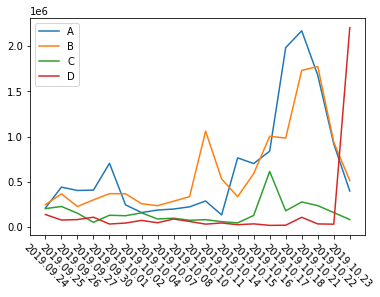

In [ ]:
import matplotlib.pyplot as plt

plt.plot(date[::-1], 그룹사별일일거래량[0][::-1], label='A')
plt.plot(date[::-1], 그룹사별일일거래량[1][::-1], label='B')
plt.plot(date[::-1], 그룹사별일일거래량[2][::-1], label='C')
plt.plot(date[::-1], 그룹사별일일거래량[3][::-1], label='D')
plt.xticks(rotation = -45 )
plt.legend(loc=2)
plt.show()

In [ ]:
for i in range(len(그룹사별일일거래량[0])):
    s = 0
    for j in range(4):
        s += 그룹사별일일거래량[j][i]
    그룹사전체일일거래량.append(s)
그룹사전체일일거래량

[3198301,
 2051067,
 3724291,
 4286651,
 3167249,
 2477184,
 1456343,
 1174487,
 771938,
 1463947,
 698527,
 673095,
 562816,
 650582,
 784490,
 1239662,
 872050,
 868624,
 1115164,
 803201]

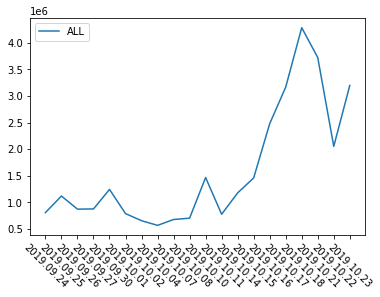

In [ ]:
import matplotlib.pyplot as plt

plt.plot(date[::-1], 그룹사전체일일거래량[::-1], label='ALL')
plt.xticks(rotation = -45 )
plt.legend(loc=2)
plt.show()

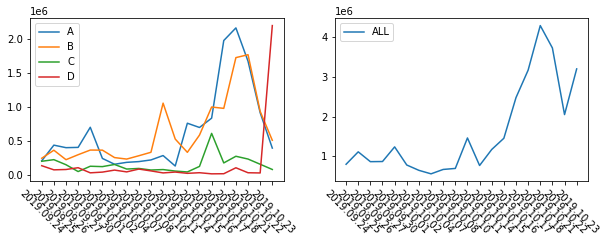

In [ ]:
f = plt.figure(figsize=(10,3))
# 1번 그림 (그룹사별)
ax = f.add_subplot(121)
ax.plot(date[::-1], 그룹사별일일거래량[0][::-1], label='A')
ax.plot(date[::-1], 그룹사별일일거래량[1][::-1], label='B')
ax.plot(date[::-1], 그룹사별일일거래량[2][::-1], label='C')
ax.plot(date[::-1], 그룹사별일일거래량[3][::-1], label='D')
plt.xticks(rotation = -45)
ax.legend(loc=2)
# 2번 그림 (전체)
ax2 = f.add_subplot(122)
ax2.figsize=(15,15)
ax2.plot(date[::-1], 그룹사전체일일거래량[::-1], label='ALL')
plt.xticks(rotation = -45)
ax2.legend(loc=2)

In [ ]:
연구원 = soup.select('.main')[2]
연구원.select('.table > tbody > tr')[1].select('td')[-1].text.replace(',','')

'398421'

In [ ]:
공업 = soup.select('.main')[3]
공업.select('.table > tbody > tr')[1].select('td')[-1].text.replace(',','')

'513365'

In [ ]:
출판사 = soup.select('.main')[4]
출판사.select('.table > tbody > tr')[1].select('td')[-1].text.replace(',','')

'83405'

In [ ]:
학원 = soup.select('.main')[5]
학원.select('.table > tbody > tr')[1].select('td')[-1].text.replace(',','')

'2203110'

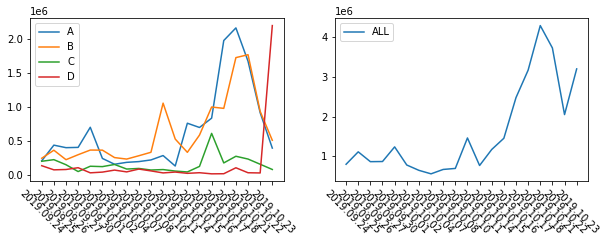

In [ ]:
import matplotlib.pyplot as plt

s그룹사별일일거래량 = [[],[],[],[]]
for i in range(1, len(soup.select('.main')[2].select('table > tbody > tr'))):
  s그룹사별일일거래량[0].append(int(연구원.select('.table > tbody > tr')[i].
                        select('td')[-1].text.replace(',', '')))
  s그룹사별일일거래량[1].append(int(공업.select('.table > tbody > tr')[i].
                        select('td')[-1].text.replace(',', '')))
  s그룹사별일일거래량[2].append(int(출판사.select('.table > tbody > tr')[i].
                        select('td')[-1].text.replace(',', '')))
  s그룹사별일일거래량[3].append(int(학원.select('.table > tbody > tr')[i].
                        select('td')[-1].text.replace(',', '')))
  
s그룹사별전체일일거래량 = []
for i in range(len(s그룹사별일일거래량[0])):
    s = 0
    for j in range(4):
        s += s그룹사별일일거래량[j][i]
    s그룹사별전체일일거래량.append(s)
# s그룹사별전체일일거래량

f = plt.figure(figsize=(10,3))
# 1번 그림 (그룹사별)
ax = f.add_subplot(121)
ax.plot(date[::-1], s그룹사별일일거래량[0][::-1], label='A')
ax.plot(date[::-1], s그룹사별일일거래량[1][::-1], label='B')
ax.plot(date[::-1], s그룹사별일일거래량[2][::-1], label='C')
ax.plot(date[::-1], s그룹사별일일거래량[3][::-1], label='D')
plt.xticks(rotation = -45)
ax.legend(loc=2)
# 2번 그림 (전체)
ax2 = f.add_subplot(122)
ax2.figsize=(15,15)
ax2.plot(date[::-1], s그룹사별전체일일거래량[::-1], label='ALL')
plt.xticks(rotation = -45)
ax2.legend(loc=2)